In [1]:
datasetName = 'eye_retina_Lukowski2019'
#datasetName value: organ_tissue_authorYear without space
dataFormat = 'tsv'
#dataFormat value: tsv (tab separated), 10X (sparse)
setwd("/stor/public/hcad/eye_retina_Lukowski2019")

In [3]:
library(Seurat)
library(data.table)
library(ggplot2)
# Load the organized dataset
if(dataFormat == 'tsv'){
    data.matrix <- data.table::fread(paste0(datasetName,"_expression.tsv.gz"), h = T, data.table = F)
} else{
   # system(paste0("tar -zxvf ", datasetName, "_expression.tar.gz")) #Invoke the unix command
   data.matrix <- Read10X(data.dir = paste0(datasetName,"_expression"))
   # data.dir: Directory containing the matrix.mtx, genes.tsv (or features.tsv), and barcodes.tsv files provided by 10X.
}
# Load the metadata and annotation
data.metadata <- read.table(file = paste0(datasetName,"_metadata.tsv"), h = T, sep = "\t", row.names = 5)
data.annotation <- read.table(file = paste0(datasetName,"_annotation.tsv"), h = T, sep = "\t", row.names = 1)


In [5]:
row.names(data.matrix) <- data.matrix[, 1]
data.matrix <- data.matrix[, -1]
data.matrix[1:5, 1:5]
data.metadata[1:5, ]
data.annotation[1:5,]

,AAACCTGAGAGTGACC-1,AAACCTGAGCCTCGTG-1,AAACCTGAGTCTCAAC-1,AAACCTGCAAGTAGTA-1,AAACCTGCACAGCGTC-1
,<int>,<int>,<int>,<int>,<int>
MIR1302-2HG,0,0,0,0,0
FAM138A,0,0,0,0,0
OR4F5,0,0,0,0,0
RP11-34P13.7,0,0,0,0,0
RP11-34P13.8,0,0,0,0,0


,organ,region,subregion,sample_status,donor_ID,donor_gender,donor_age
,<fct>,<fct>,<fct>,<fct>,<lgl>,<lgl>,<lgl>
AAACCTGAGAGTGACC-1,Eye,Retina,Neural retina,Normal,NA,NA,NA
AAACCTGAGCCTCGTG-1,Eye,Retina,Neural retina,Normal,NA,NA,NA
AAACCTGAGTCTCAAC-1,Eye,Retina,Neural retina,Normal,NA,NA,NA
AAACCTGCAAGTAGTA-1,Eye,Retina,Neural retina,Normal,NA,NA,NA
AAACCTGCACAGCGTC-1,Eye,Retina,Neural retina,Normal,NA,NA,NA


[1] NA NA NA NA NA

In [6]:
# Pre-processing for part 1
min.cells = 3
min.features = 200
nFeature_RNA_range = c(200, 2500)
percent.mt.thre = 10
# Modify the default value of these parameters according to original paper
dataobj <- CreateSeuratObject(counts = data.matrix, project = datasetName, min.features = min.features, meta.data = data.metadata)
dataobj <- AddMetaData(dataobj, metadata = data.annotation)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [7]:
dataobj@assays

$RNA
Assay data with 32838 features for 21979 cells
First 10 features:
 MIR1302-2HG, FAM138A, OR4F5, RP11-34P13.7, RP11-34P13.8, RP11-34P13.14,
RP11-34P13.9, AP006222.2, RP5-857K21.15, RP4-669L17.2 


In [8]:
# Normalization
# Two approaches
# 1. run standard log normalization 
dataobj <- NormalizeData(dataobj, normalization.method = "LogNormalize", scale.factor = 10000)
dataobj <- FindVariableFeatures(dataobj) # default feature number, nfeatures = 2000
dataobj <- ScaleData(dataobj, features = VariableFeatures(object = dataobj))
# 2. run sctransform 
# dataobj <- SCTransform(dataobj, vars.to.regress = "percent.mt", do.correct.umi = TRUE, do.scale = TRUE, do.center = TRUE)

Centering and scaling data matrix



In [9]:
# Dimensional Reduction
dataobj <- RunPCA(dataobj, features = VariableFeatures(object = dataobj))
# Determine the ‘dimensionality’ of the dataset according to elbow plot

PC_ 1 
Positive:  BASP1, MGARP, BEX3, NEAT1, NDRG4, PAX6, MARCKS, MEG3, GPM6A, MARCKSL1 
	   TUBB2A, AKAP12, THY1, GNAS, DKK3, TAGLN3, ATP1B1, CEND1, RP11-96L14.7, TMSB4X 
	   PCDH9, RTN1, FEZ1, CLTB, MAPT, TCEAL7, SIX3, UCHL1, LSAMP, BEX1 
Negative:  AIPL1, RHO, YBX3, GUK1, GUCA1B, PCAT4, LAPTM4B, ALDOC, VTN, HSP90AA1 
	   CASQ1, IFI27, ANXA6, NXNL1, AF131216.5, TUBA1B, LBH, RP11-212I21.2, PDLIM3, CCDC39 
	   FABP4, FAM89A, HBB, NPPC, RP11-143P4.2, RP11-378E13.4, RP11-773H22.4, RP11-307C19.1, KLRC4, PYHIN1 
PC_ 2 
Positive:  WIF1, FRZB, TF, SPP1, TRDN, RLBP1, APOE, CP, RGR, PTGDS 
	   HES1, VIM, PRSS35, CLU, SLC1A3, C1orf61, FABP7, TSC22D4, SELENOP, RARRES2 
	   CRABP1, MT2A, DKK3, LINC00844, GPX3, GLUL, KCNJ10, F3, CRYAB, CD9 
Negative:  CEND1, TAGLN3, CAMK2B, GNG3, SNAP25, PCP4, ATP6V1G2, FGF12, EDIL3, GNAO1 
	   CALY, CPLX3, NSG1, KIF5C, RTN1, ATP1B1, TCEAL6, GNG13, SCG5, ELAVL3 
	   GRIA2, UCHL1, FAIM2, STMN2, CELF4, ISL1, AANAT, CCDC136, CABP1, JPH4 
PC_ 3 
Positive:  CD74, HLA-D

Warning message in ElbowPlot(dataobj, ndims = 100):
“The object only has information for 50 reductions”


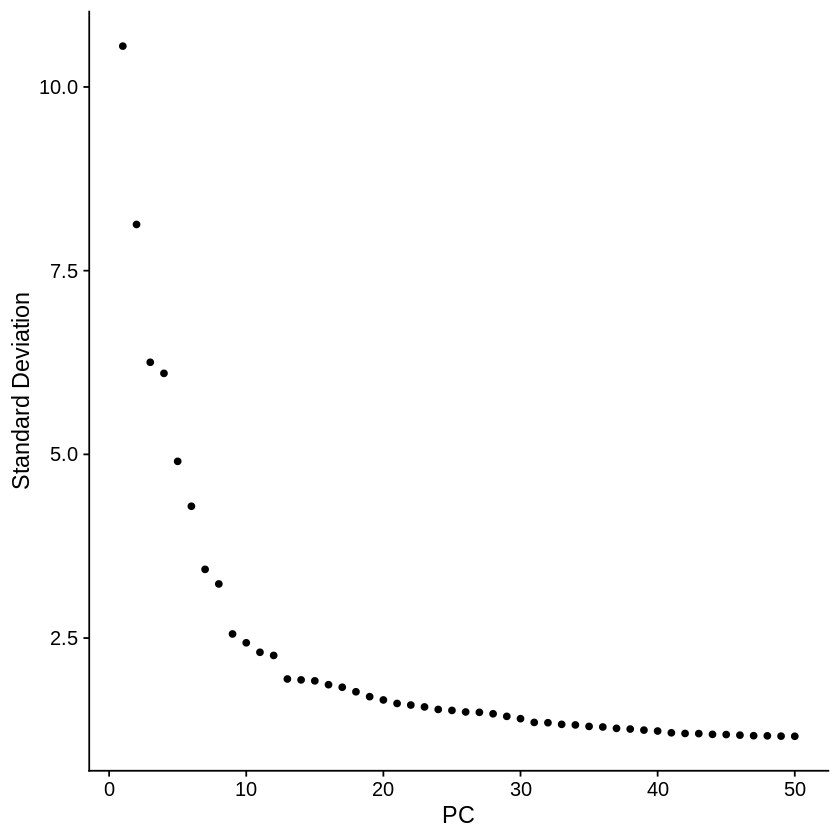

In [10]:
ElbowPlot(dataobj, ndims = 100) 
# pdf(paste0(datasetName,"seurat.elbowplot.pdf"))

In [11]:
dev.off()
pcDim = 20 # set as 75 in this case 
# dataobj <- RunUMAP(dataobj, dims = 1:pcDim)
# DimPlot(dataobj, reduction = "tsne", label = TRUE)
# ggsave(paste0(datasetName,".seurat.umap.tiff", plot = p_umap, width = 8, height = 5)

null device 
          1

In [12]:
# Cluster the cells
dataobj <- FindNeighbors(dataobj, reduction = "pca", dims = 1:pcDim)
dataobj <- FindClusters(dataobj, resolution = 0.6)
# umap
dataobj <- RunUMAP(dataobj, dims = 1:pcDim)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 21979
Number of edges: 790067

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8989
Number of communities: 21
Elapsed time: 5 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
08:42:04 UMAP embedding parameters a = 0.9922 b = 1.112

08:42:04 Read 21979 rows and found 20 numeric columns

08:42:04 Using Annoy for neighbor search, n_neighbors = 30

08:42:04 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

08:42:08 Writing NN index file to temp file /tmp/RtmpKl8jaF/file3480402632b4

08:42:08 Searching Annoy index using 1 thread, search_k = 3000

08:42:16 Annoy recall = 100%

08:42:16 Commencing smooth kNN distance calibration using 1 thread

08:42:18 Initializing f

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


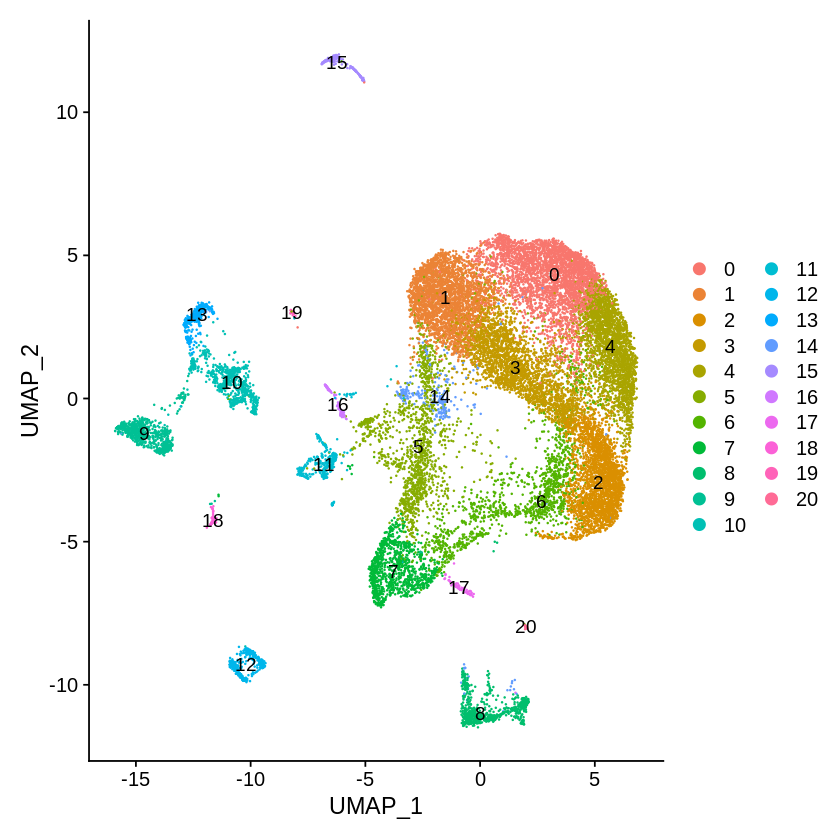

In [13]:
# Clusters marked by Seurat clustering results
p_umap <- DimPlot(dataobj, reduction = "umap", label = TRUE)
p_umap

In [14]:
ggsave(paste0(datasetName,".seurat.umap.tiff"), plot = p_umap, width = 8, height = 5)

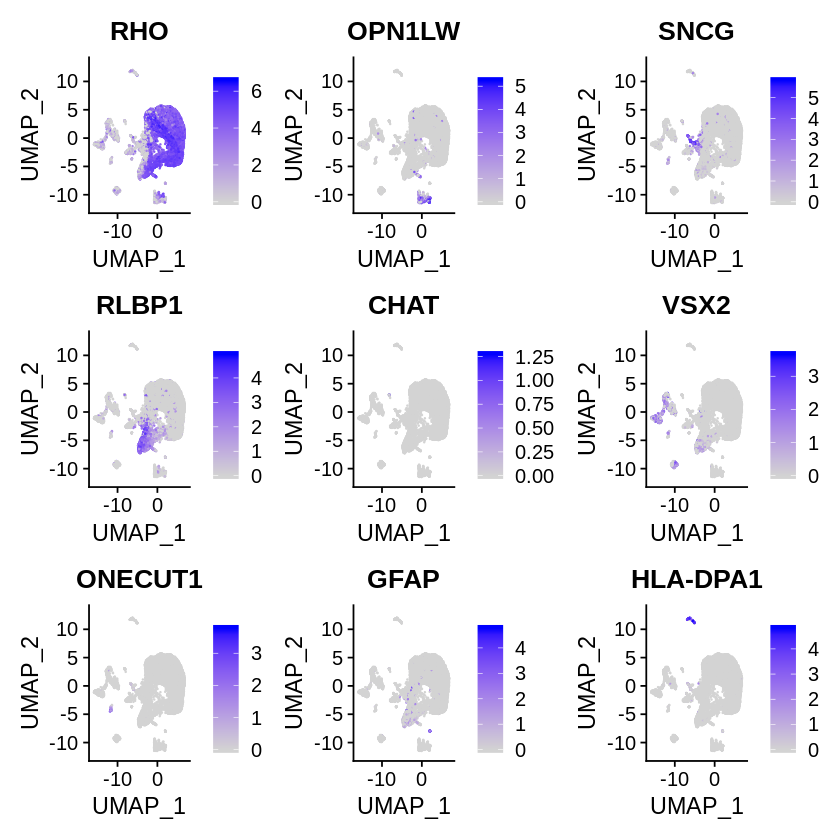

In [15]:
p <- FeaturePlot(dataobj, features = c("RHO", "OPN1LW", "SNCG", "RLBP1", "CHAT", "VSX2", "ONECUT1", "GFAP", "HLA-DPA1"))
p

In [16]:
# Finding cluster markers 
dataobj.markers <- FindAllMarkers(dataobj, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
write.table(dataobj.markers, file = paste0(datasetName,".seurat.markers.txt"), sep = "\t", quote = F, row.names = F, col.names = T)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster 17

Calculating cluster 18

Calculating cluster 19

Calculating cluster 20



In [17]:
new.cluster.ids <- c("Eye-Nerve tissue-Rod cell-PDE6A", "Eye-Nerve tissue-Rod cell-RHO", "Eye-Nerve tissue-Rod cell-RHO",
                    "Eye-Nerve tissue-Rod cell-RHO", "Eye-Nerve tissue-Rod cell-PDE6A", "Eye-Nerve tissue-Muller cell-RLBP1",
                    "Eye-Nerve tissue-Rod cell-RHO", "Eye-Nerve tissue-Muller cell-RLBP1", "Eye-Nerve tissue-Cone cell-OPN1LW",
                    "Eye-Nerve tissue-Bipolar cell-VSX2", "Eye-Nerve tissue-Bipolar cell-VSX2","Eye-Nerve tissue-Amacrine cell-GAD1",
                    "Eye-Nerve tissue-Bipolar cell-OTX2", "Eye-Nerve tissue-Bipolar cell-VSX2", "Eye-Nerve tissue-Cone cell-ARR3",
                    "Eye-Nerve tissue-Microglia-HLA-DPA1", "Eye-Nerve tissue-Retinal ganglion cell-SNCG", "Eye-Nerve tissue-Muller cell-RLBP1",
                    "Eye-Nerve tissue-Horizontal cell-ONECUT1", "Eye-Nerve tissue-Amacrine cell-GAD1", "Eye-Nerve tissue-Astrocyte-GFAP")
names(new.cluster.ids) <- levels(dataobj)
dataobj <- RenameIdents(dataobj, new.cluster.ids)

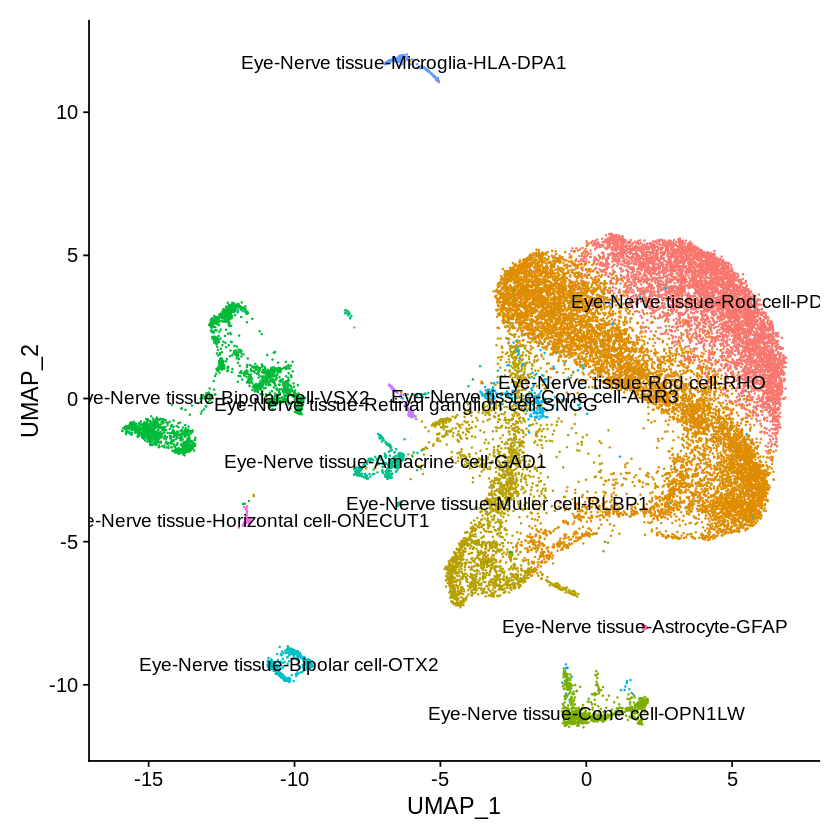

In [20]:
p_umap2 <- DimPlot(dataobj, reduction = "umap", label = TRUE)  + NoLegend()
p_umap2

In [21]:
ggsave(paste0(datasetName,".seurat.umap_hcad.tiff"), plot = p_umap2, width = 8, height = 5)

In [22]:
saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))